In [1]:
import numpy as np
from numpy import NaN
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:

df = pd.read_excel("AirQualityUCI.xlsx")

#convert Date and Time values:
df['Date'] = df['Date'].dt.month
df['Time'] = pd.to_datetime(df['Time'], format='%X').dt.hour

df = df.replace(-200, NaN) #replace -200 with NaN values

df =  df.drop(['NMHC(GT)'], axis=1) #drop column NMHC(GT) since it has too many missing values
df = df.dropna() #drop rows with missing value
df = df.drop_duplicates() 
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,12]] #make RH the last column

In [4]:
arr = df.to_numpy()
X = arr[:, 0:13]
Y = arr[:, 13]

#Test Train Split:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1)) #convert row vector to column vector

In [5]:
# Normalising Data:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [6]:
model1 = tf.keras.Sequential([normalizer])
model1.add(Dense(64, input_dim=13, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='relu'))
model1.summary()
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,148
Trainable params: 5,121
Non-trainable params: 27
_________________________________________________________________


Epoch 1/100
174/174 [==============================] - 1s 633us/step - loss: 1565.2473
Epoch 2/100
174/174 [==============================] - 0s 662us/step - loss: 340.5510
Epoch 3/100
174/174 [==============================] - 0s 663us/step - loss: 117.3701
Epoch 4/100
174/174 [==============================] - 0s 635us/step - loss: 55.6053
Epoch 5/100
174/174 [==============================] - 0s 657us/step - loss: 36.3169
Epoch 6/100
174/174 [==============================] - 0s 650us/step - loss: 26.2416
Epoch 7/100
174/174 [==============================] - 0s 634us/step - loss: 20.1428
Epoch 8/100
174/174 [==============================] - 0s 638us/step - loss: 16.1011
Epoch 9/100
174/174 [==============================] - 0s 653us/step - loss: 13.1434
Epoch 10/100
174/174 [==============================] - 0s 692us/step - loss: 10.9516
Epoch 11/100
174/174 [==============================] - 0s 658us/step - loss: 9.2645
Epoch 12/100
174/174 [==============================] - 0s 6

174/174 [==============================] - 0s 632us/step - loss: 0.1467
Epoch 98/100
174/174 [==============================] - 0s 633us/step - loss: 0.1317
Epoch 99/100
174/174 [==============================] - 0s 639us/step - loss: 0.1344
Epoch 100/100
174/174 [==============================] - 0s 652us/step - loss: 0.1361


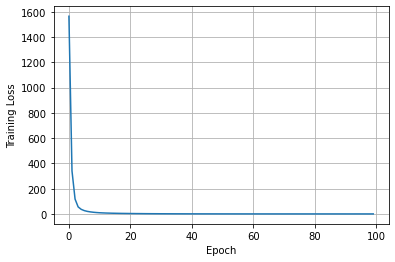

In [7]:
history1 = model1.fit(X_train, Y_train, epochs=100)

plt.plot(history1.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()


In [8]:
Y_pred1 = model1.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 653us/step - loss: 0.1922


In [9]:
model2 = tf.keras.Sequential([normalizer])
model2.add(Dense(256, input_dim=13, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.summary()
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 256)               3584      
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 69,660
Trainable params: 69,633
Non-trainable params: 27
_________________________________________________________________


Epoch 1/100
174/174 [==============================] - 0s 725us/step - loss: 631.1265
Epoch 2/100
174/174 [==============================] - 0s 759us/step - loss: 51.2195
Epoch 3/100
174/174 [==============================] - 0s 728us/step - loss: 27.3323
Epoch 4/100
174/174 [==============================] - 0s 717us/step - loss: 20.1617
Epoch 5/100
174/174 [==============================] - 0s 730us/step - loss: 15.8068
Epoch 6/100
174/174 [==============================] - 0s 739us/step - loss: 11.3014
Epoch 7/100
174/174 [==============================] - 0s 734us/step - loss: 8.0485
Epoch 8/100
174/174 [==============================] - 0s 731us/step - loss: 6.1204
Epoch 9/100
174/174 [==============================] - 0s 726us/step - loss: 4.8114
Epoch 10/100
174/174 [==============================] - 0s 745us/step - loss: 4.0174
Epoch 11/100
174/174 [==============================] - 0s 737us/step - loss: 3.2181
Epoch 12/100
174/174 [==============================] - 0s 768us/st

174/174 [==============================] - 0s 775us/step - loss: 0.1066
Epoch 98/100
174/174 [==============================] - 0s 751us/step - loss: 0.1565
Epoch 99/100
174/174 [==============================] - 0s 757us/step - loss: 0.1841
Epoch 100/100
174/174 [==============================] - 0s 764us/step - loss: 0.1003


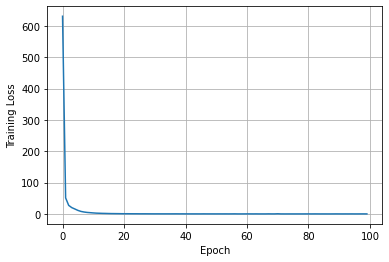

In [10]:
history2 = model2.fit(X_train, Y_train, epochs=100)

plt.plot(history2.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [11]:
Y_pred2 = model2.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 698us/step - loss: 0.1727


In [12]:
#3rd Model

model3 = tf.keras.Sequential([normalizer])
model3.add(Dense(512, input_dim=13, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1, activation='relu'))
model3.summary()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 512)               7168      
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 270,364
Trainable params: 270,337
Non-trainable params: 27
_________________________________________________________________


Epoch 1/100
174/174 [==============================] - 1s 1ms/step - loss: 485.8799
Epoch 2/100
174/174 [==============================] - 0s 1ms/step - loss: 34.2496
Epoch 3/100
174/174 [==============================] - 0s 1ms/step - loss: 18.3503
Epoch 4/100
174/174 [==============================] - 0s 1ms/step - loss: 11.2726
Epoch 5/100
174/174 [==============================] - 0s 1ms/step - loss: 8.0534
Epoch 6/100
174/174 [==============================] - 0s 1ms/step - loss: 6.2885
Epoch 7/100
174/174 [==============================] - 0s 1ms/step - loss: 5.1215
Epoch 8/100
174/174 [==============================] - 0s 1ms/step - loss: 4.3280
Epoch 9/100
174/174 [==============================] - 0s 1ms/step - loss: 3.5661
Epoch 10/100
174/174 [==============================] - 0s 1ms/step - loss: 2.9170
Epoch 11/100
174/174 [==============================] - 0s 1ms/step - loss: 2.3105
Epoch 12/100
174/174 [==============================] - 0s 1ms/step - loss: 2.0626
Epoch 13

174/174 [==============================] - 0s 1ms/step - loss: 0.1157
Epoch 100/100
174/174 [==============================] - 0s 1ms/step - loss: 0.3158


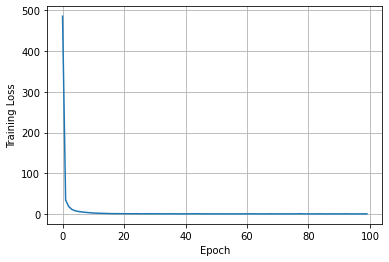

In [13]:
#Training the model:
history3 = model3.fit(X_train, Y_train, epochs=100)

plt.plot(history3.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [14]:
#Test Loss:
Y_pred3 = model3.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 779us/step - loss: 0.2399


In [15]:
#4th Model

model4 = tf.keras.Sequential([normalizer])
model4.add(Dense(256, input_dim=13, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(1, activation='relu'))
model4.summary()
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_9 (Dense)             (None, 256)               3584      
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                      

Epoch 1/100
174/174 [==============================] - 1s 1ms/step - loss: 1173.4167
Epoch 2/100
174/174 [==============================] - 0s 1ms/step - loss: 142.4001
Epoch 3/100
174/174 [==============================] - 0s 1ms/step - loss: 39.4418
Epoch 4/100
174/174 [==============================] - 0s 1ms/step - loss: 21.3020
Epoch 5/100
174/174 [==============================] - 0s 1ms/step - loss: 14.1420
Epoch 6/100
174/174 [==============================] - 0s 1ms/step - loss: 10.2532
Epoch 7/100
174/174 [==============================] - 0s 1ms/step - loss: 7.8797
Epoch 8/100
174/174 [==============================] - 0s 1ms/step - loss: 6.2211
Epoch 9/100
174/174 [==============================] - 0s 1ms/step - loss: 5.2568
Epoch 10/100
174/174 [==============================] - 0s 1ms/step - loss: 4.3899
Epoch 11/100
174/174 [==============================] - 0s 1ms/step - loss: 3.4992
Epoch 12/100
174/174 [==============================] - 0s 1ms/step - loss: 3.0109
Epoc

174/174 [==============================] - 0s 1ms/step - loss: 0.1455
Epoch 100/100
174/174 [==============================] - 0s 1ms/step - loss: 0.1711


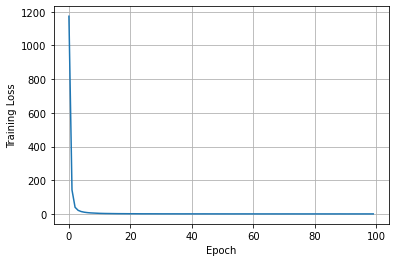

In [16]:
#Training the model:
history4 = model4.fit(X_train, Y_train, epochs=100)

plt.plot(history4.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [17]:
Y_pred4 = model4.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 791us/step - loss: 0.4103


In [19]:


#5th Model

model5 = tf.keras.Sequential([normalizer])
model5.add(Dense(512, input_dim=13, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(1, activation='relu'))
model5.summary()
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')
     


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_15 (Dense)            (None, 512)               7168      
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                      

Epoch 1/100
174/174 [==============================] - 1s 1ms/step - loss: 1946.4490
Epoch 2/100
174/174 [==============================] - 0s 1ms/step - loss: 320.5715
Epoch 3/100
174/174 [==============================] - 0s 1ms/step - loss: 119.5859
Epoch 4/100
174/174 [==============================] - 0s 1ms/step - loss: 55.1611
Epoch 5/100
174/174 [==============================] - 0s 1ms/step - loss: 32.9950
Epoch 6/100
174/174 [==============================] - 0s 1ms/step - loss: 21.9371
Epoch 7/100
174/174 [==============================] - 0s 1ms/step - loss: 16.4109
Epoch 8/100
174/174 [==============================] - 0s 1ms/step - loss: 13.3148
Epoch 9/100
174/174 [==============================] - 0s 1ms/step - loss: 11.1640
Epoch 10/100
174/174 [==============================] - 0s 1ms/step - loss: 9.5307
Epoch 11/100
174/174 [==============================] - 0s 1ms/step - loss: 8.3240
Epoch 12/100
174/174 [==============================] - 0s 1ms/step - loss: 7.3150


174/174 [==============================] - 0s 1ms/step - loss: 0.0879
Epoch 100/100
174/174 [==============================] - 0s 1ms/step - loss: 0.0770


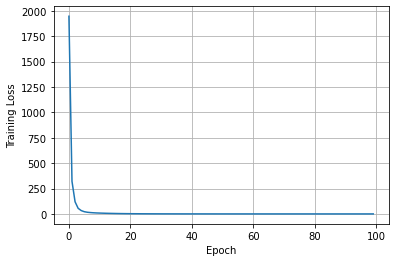

In [20]:
history5 = model5.fit(X_train, Y_train, epochs=100)

plt.plot(history5.history['loss'])
# plt.ylim([0,10])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [21]:

#Test Loss:
Y_pred5 = model5.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 858us/step - loss: 0.2372
